<a href="https://colab.research.google.com/github/kelvinkankan/FMP-trial/blob/main/statmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as plt
import statsmodels.formula.api as sm
import sys


In [40]:
from urllib.request import urlopen

In [41]:
%matplotlib inline

# Linear Regression Fit

In [42]:
# Linear Regression Fit
# to get reproductive values, create a seed value
np.random.seed(987654321)

In [43]:
# generate a noisy line
x = np.arange(100)
y = 0.5*x - 20 + np.random.randn(len(x))
df = pd.DataFrame({'x':x, 'y':y})

In [44]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [45]:
y

array([-17.75344919, -20.14591822, -20.18357699, -16.57050748,
       -17.93318601, -18.49705976, -16.18467017, -17.84093681,
       -14.08936309, -14.7904166 , -13.87065311, -15.63954797,
       -13.69094462, -14.09446676, -14.09133334, -12.13329782,
       -12.38767771, -13.13701592,  -9.2740224 ,  -9.71491   ,
       -10.8366603 ,  -9.01382828,  -8.18060787,  -6.9430221 ,
        -7.51632233,  -9.33265051,  -8.08355634,  -7.83236621,
        -5.55834953,  -3.40614433,  -6.43221871,  -3.5117589 ,
        -4.29748081,  -3.7945771 ,  -4.19997313,  -2.64268206,
        -3.74677719,  -1.93762605,  -2.20516626,  -1.11006641,
        -0.2034529 ,   0.58531001,   2.85372594,   0.88517272,
         2.09115138,   2.86702741,   3.33728978,   1.09642535,
         2.99153513,   4.14781635,   5.59803017,   6.0730266 ,
         6.21565208,   6.06378034,   7.20902803,   7.90601726,
         7.88766703,   8.84113861,   7.56422298,  10.21924928,
        11.02244615,  11.96363313,  12.37524998,   9.61

In [46]:
df

,x,y
0,0,-17.753449
1,1,-20.145918
2,2,-20.183577
3,3,-16.570507
4,4,-17.933186
...,...,...
95,95,28.674307
96,96,25.528235
97,97,28.768628
98,98,28.964776


<AxesSubplot:xlabel='x', ylabel='y'>

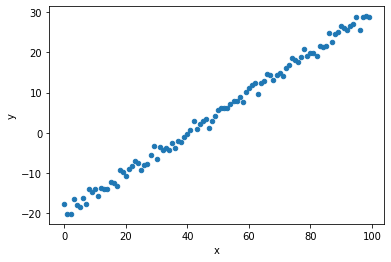

In [47]:
df.plot.scatter(x='x',y='y')

In [48]:
# Fit a linear model
# Note the formula language used to denote the relationship between 'x' and 'y'
model = sm.ols('y~x', data = df).fit()
model

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.819e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          4.31e-113
Time:                        21:24:26   Log-Likelihood:                -147.60
No. Observations:                 100   AIC:                             299.2
Df Residuals:                      98   BIC:                             304.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.9742      0.212    -94.083      0.0

# Example from Altman "Practical Statistics for medical research"

In [50]:
# Get the data from the web
inFile = 'altman_94.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urlopen(url), delimiter=',')
data

array([[ 9.21,  0.  ],
       [ 7.53,  1.  ],
       [ 7.48,  1.  ],
       [ 8.08,  1.  ],
       [ 8.09,  1.  ],
       [10.15,  1.  ],
       [ 8.4 ,  1.  ],
       [10.88,  1.  ],
       [ 6.13,  1.  ],
       [ 7.9 ,  1.  ],
       [11.51,  0.  ],
       [12.79,  0.  ],
       [ 7.05,  1.  ],
       [11.85,  0.  ],
       [ 9.97,  0.  ],
       [ 7.48,  1.  ],
       [ 8.79,  0.  ],
       [ 9.69,  0.  ],
       [ 9.68,  0.  ],
       [ 7.58,  1.  ],
       [ 9.19,  0.  ],
       [ 8.11,  1.  ]])

In [51]:
# Bring them into pandas format
lean = pd.Series(data[data[:,1]==1,0])
obese = pd.Series(data[data[:,1]==0,0])


In [52]:
lean

0      7.53
1      7.48
2      8.08
3      8.09
4     10.15
5      8.40
6     10.88
7      6.13
8      7.90
9      7.05
10     7.48
11     7.58
12     8.11
dtype: float64

In [53]:
obese

0     9.21
1    11.51
2    12.79
3    11.85
4     9.97
5     8.79
6     9.69
7     9.68
8     9.19
dtype: float64

In [54]:
df = pd.DataFrame({'Lean': lean, 'Obese': obese})
df

,Lean,Obese
0,7.53,9.21
1,7.48,11.51
2,8.08,12.79
3,8.09,11.85
4,10.15,9.97
5,8.40,8.79
6,10.88,9.69
7,6.13,9.68
8,7.90,9.19
9,7.05,NaN


In [55]:
df.describe()

,Lean,Obese
count,13.000000,9.000000
mean,8.066154,10.297778
std,1.238080,1.397871
min,6.130000,8.790000
25%,7.480000,9.210000
50%,7.900000,9.690000
75%,8.110000,11.510000
max,10.880000,12.790000


<AxesSubplot:>

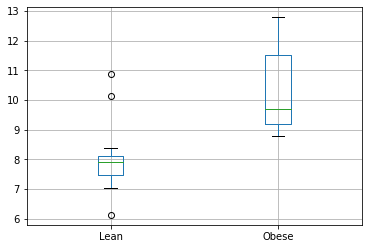

In [56]:
# show a boxplot
# Note that by using data-frames, the display can get automatically labelled correctly
# - also for the next plot
df.boxplot(return_type='axes')

In [57]:
# find p-value
t, pVal = stats.ttest_ind(lean,obese)

In [58]:
t

-3.9455649161549835

In [59]:
pVal

0.0007989982111700593

In [60]:
if pVal<0.05:
  print(rf'There is a significant difference: p = {pVal}')

There is a significant difference: p = 0.0007989982111700593
